<a href="https://colab.research.google.com/github/lemmgator/AiSD164412/blob/main/kolokwium2/BinarySearchTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from typing import Any, List
from graphviz import Digraph
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# BinaryNode

In [ ]:
class BinaryNode:
    value: Any
    left_child: 'BinaryNode'
    right_child: 'BinaryNode'

    def __init__(self, value: Any) -> None:
        self.value = value
        self.left_child = None
        self.right_child = None

    def min(self) -> 'BinaryNode':
        if self.left_child:
            return self.left_child.min()
        return self

    def __str__(self) -> str:
        return str(self.value)

# BinarySearchTree

In [ ]:
class BinarySearchTree:
    root: BinaryNode

    def __init__(self, root) -> None:
        self.root = root

    def insert(self, value: Any) -> None:
        if self.contains(value):
            return
        self.root = self.__insert(self.root, value)

    def __insert(self, node: BinaryNode, value: Any) -> BinaryNode:
        if node:
            if value < node.value:
                node.left_child = self.__insert(node.left_child, value)
            else:
                node.right_child = self.__insert(node.right_child, value)
        else:
            node = BinaryNode(value)
        return node

    def insert_list(self, list_: List[Any]) -> None:
        for i in list_:
            self.insert(i)

    def contains(self, value: Any) -> bool:
        temp = self.root
        while temp:
            if value == temp.value:
                return True
            if value < temp.value:
                temp = temp.left_child
            else:
                temp = temp.right_child
        return False

    def remove(self, value: Any) -> None:
        if self.contains(value):
            self.root = self.__remove(self.root, value)

    def __remove(self, node: BinaryNode, value: Any) -> BinaryNode:
        if value == node.value:
            if node.left_child and node.right_child:
                node.value = node.right_child.min().value
                node.right_child = self.__remove(
                    node.right_child, node.right_child.min().value)
            elif node.left_child:
                node = node.left_child
            elif node.right_child:
                node = node.right_child
            else:
                if node == self.root:
                    node.value = 0
                else:
                    node = None
        elif value < node.value:
            node.left_child = self.__remove(node.left_child, value)
        else:
            node.right_child = self.__remove(node.right_child, value)
        return node

    def show(self, g=Digraph('g')) -> None:
        q = [self.root]
        while q:
            g.node(str(q[0]), str(q[0]), shape='circle')
            if q[0].left_child:
                g.edge(str(q[0]), str(q[0].left_child), color='red')
                q.append(q[0].left_child)
            if q[0].right_child:
                g.edge(str(q[0]), str(q[0].right_child), color='blue')
                q.append(q[0].right_child)
            q.pop(0)
        g.render(filename='bst', format='png', cleanup=True, view=True)
        plt.imshow(mpimg.imread('bst.png'))
        plt.axis('off')

In [ ]:
def main() -> None:
    # inicjalizacja drzewa
    drzewo = BinarySearchTree(BinaryNode(8))

    # min() przed dodaniem
    print(drzewo.root.min())

    # dodawanie elementow z listy
    drzewo.insert_list([3, 10, 14, 6, 7, 1, 4, 13, 2, 5, 9, 15])

    # min() po dodaniu
    print(drzewo.root.min())

    # czy zawiera 1 (True)
    print(drzewo.contains(1))

    # czy zawiera 15 (True)
    print(drzewo.contains(15))

    # usuwanie 2, 5, 9, 15
    drzewo.remove(2)
    drzewo.remove(5)
    drzewo.remove(9)
    drzewo.remove(15)

    # czy zawiera 15 (False)
    print(drzewo.contains(15))

    # renderowanie drzewa
    drzewo.show()

8
1
True
True
False


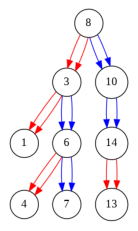

In [ ]:
main()